# Case Study on Probability for Data Science

## Problem Statement:
    To make a suitable machine learning algorithm to predict if the mushroom is edible or
    poisonous (e or p) using the given dataset.
    (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
    Also, if some data pre-processing is necessary do that as well.

## Dataset: 'mushrooms.csv'

    The dataset used in this project is mushrooms.csv that contains 8124 instances of mushrooms
    with 23 features like cap-shape, cap-surface, cap-color, bruises, odor, etc.
    We’ll use the specifications like cap shape, cap color, gill color, etc. to classify
    the mushrooms into edible or poisonous.

### Attribute Information:

    • cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
    • cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
    • cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u, red=e,
        white=w, yellow=y
    • bruises: bruises=t, no=f
    • odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p,
        spicy=s
    • gill-attachment: attached=a, descending=d, free=f, notched=n
    • gill-spacing: close=c, crowded=w, distant=d
    • gill-size: broad=b, narrow=n
    • gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o,
        pink=p, purple=u, red=e, white=w, yellow=y
    • stalk-shape: enlarging=e, tapering=t
    • Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
    • stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
    • stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
    • stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e,
        white=w, yellow=y
    • stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e,
        white=w, yellow=y
    • veil-type: partial=p, universal=u
    • veil-colour: brown=n, orange=o, white=w, yellow=y
    • ring-number: none=n, one=o, two=t
    • ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s,
        zone=z
    • spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,
        purple=u, white=w, yellow=y
    • population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
    • habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

### Choose a measure of success:

    Given the nature of our problem; classifying whether a mushroom is poisonous or not,
    we will be using precision as our measure of success.
    Precision is the ability of the classifier not to label poisonous mushrooms as edible. 
    
    Confusion Matrix can be used to verify the accuracy of prediction classification
    with respect to true positives and negatives.

In [1]:
#Importing the python libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor, ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the CSV file of the dataset to DataFrame-'data'
data = pd.read_csv('mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
#shape of the dataset
print("Dataset shape:", data.shape)

Dataset shape: (8124, 23)


In [6]:
#summary of DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
#checking for null values
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Observations: 
    Our dataset contains 8124 rows i.e instances of mushrooms and 23 columns.
   
    The first column is the target variable containing the class labels,
    identifying whether the mushroom is poisonous or edible.
    
    The remaining columns are 22 discrete features that describe the mushroom in 
    some observable way; their values are encoded by characters.
    
    There are no missing/null values in the dataset.

In [8]:
#descriptive statistics
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


    Observations:
        All features are categorical. 
        Most no of unique occurences of various features is based on the property-color.

## Exploratory Data Analysis:

In [9]:
#Defining a function for countplots

features = data.drop(columns='class')

def countplot(col):
    plt.figure()
    sns.countplot(features[col])
    plt.ylabel('Count of Samples')
    plt.title(' ' + col.title())
    plt.xlabel('Type of' + ' ' + col.title())
    plt.show

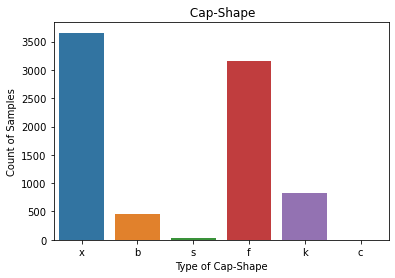

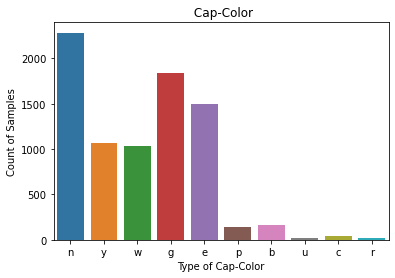

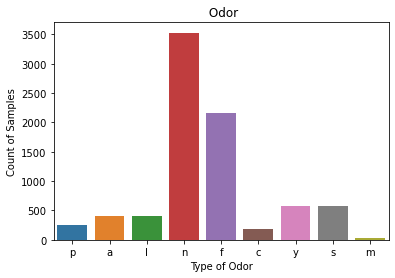

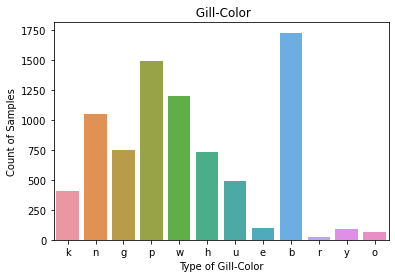

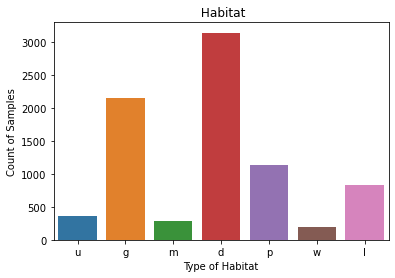

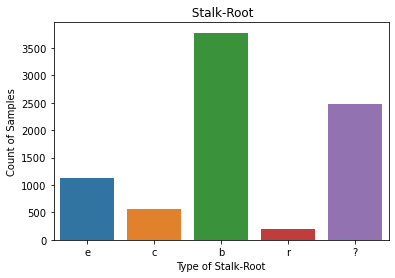

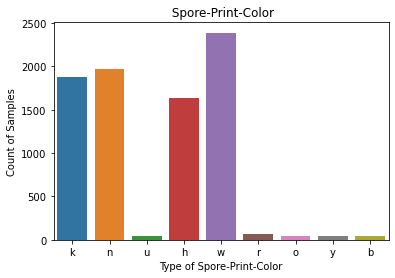

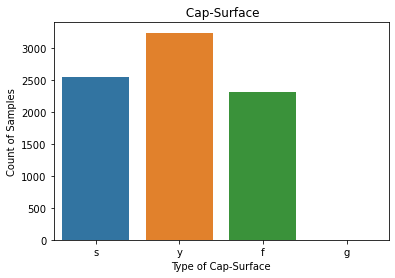

In [10]:
#countplots of some features
countplot('cap-shape')
countplot('cap-color')
countplot('odor')
countplot('gill-color')
countplot('habitat')
countplot('stalk-root')
countplot('spore-print-color')
countplot('cap-surface')

### Observations: 
    Count plot of Stalk-root indicates that the feature stalk root has
    some missing values, denoted by ?.
    In this analysis, we may exclude any instance that has missing values for stalk root.
    But here, we do not exclude these instances as it may affect the balance of dataset.

In [11]:
#copying DataFrame to 'df'
df = data.copy(deep=True)

In [12]:
#exclude instances that has missing values for stalk-root
#df = df[df['stalk-root'] != '?']

In [13]:
#unique values of ‘class’ column
df['class'].unique()

array(['p', 'e'], dtype=object)

    Observations: 
    As we can see, there are two unique categories in the ‘class’ column of the dataset namely:
    ‘p’ - poisonous and ‘e’ - edible

In [14]:
#count of the unique occurrences of ‘class’ column
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [15]:
#defining a function for displaying total label-count in graphs

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
                
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

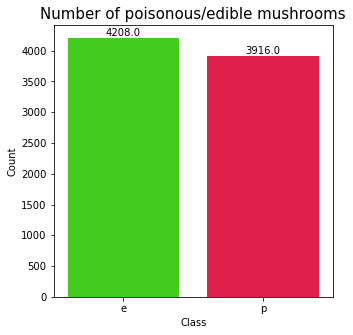

In [16]:
#Let’s visualize the count of edible and poisonous mushrooms using Seaborn

count = df['class'].value_counts()
plt.figure(figsize=(5,5))
p = sns.barplot(count.index, count.values, palette="prism")
show_values(p)
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Number of poisonous/edible mushrooms', fontsize=15)
plt.show();

    Observations: 
    As we can see, there are 4208 occurrences of edible mushrooms and 3916 occurrences of
    poisonous mushrooms in the dataset.

## Data Preprocessing:- Label Encoding

In [17]:
#datatype of features
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

### Comments:
    As we can see, our feature columns are of categorical type.
    We can now use LabelEncoder to convert categorical values to numeric or ordinal.

In [18]:
#We will use LabelEncoder to encode our categorical variables:
#df.apply(LabelEncoder().fit_transform)

labelenc = LabelEncoder()
for column in df.columns:
    df[column] = labelenc.fit_transform(df[column])

In [19]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


    Comments: All categorical values encoded to numeric.

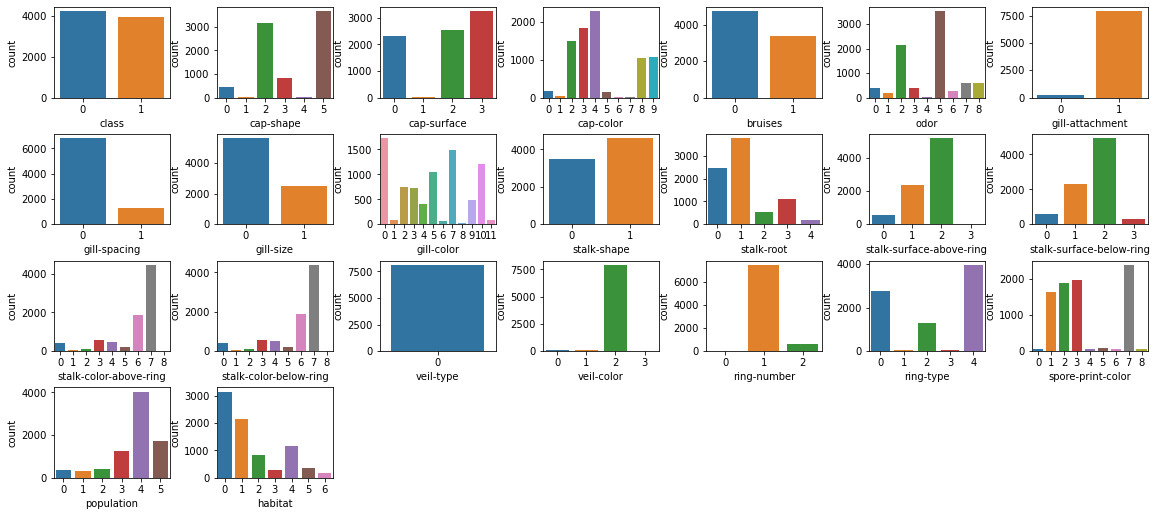

In [20]:
#EDA after encoding
figure = plt.figure(figsize=(19 , 19))
for i, c in enumerate(df.columns):
  figure.add_subplot(10, 7, i+1)
  sns.countplot(x = f"{c}", data=df)
  plt.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [21]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

    Observations: 
    After label encoding, there are two unique values in the ‘class’ column of the dataset:
    ‘1’ - poisonous
    ‘0’ - edible

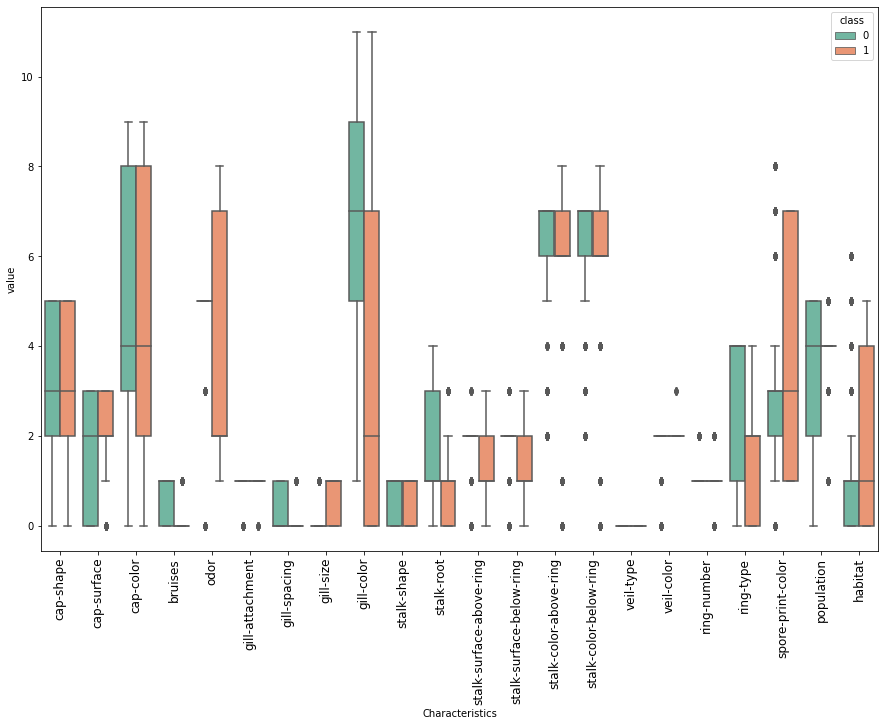

In [22]:
#box plot represents the distribution of the feature characteristics

df_bplot = pd.melt(df, 'class', var_name='Characteristics')

fig, ax = plt.subplots(figsize=(15,10))

bplot = sns.boxplot(ax=ax, x='Characteristics', y='value', hue='class', data=df_bplot, palette='Set2')

df_dropclass = df.drop(['class'], axis=1)

bplot.set_xticklabels(rotation=90, labels=list(df_dropclass.columns), fontsize=12);

    Comments:
    From boxplot, outliers can be identified.
    To get a good idea about distribution, we can go for violinplot.

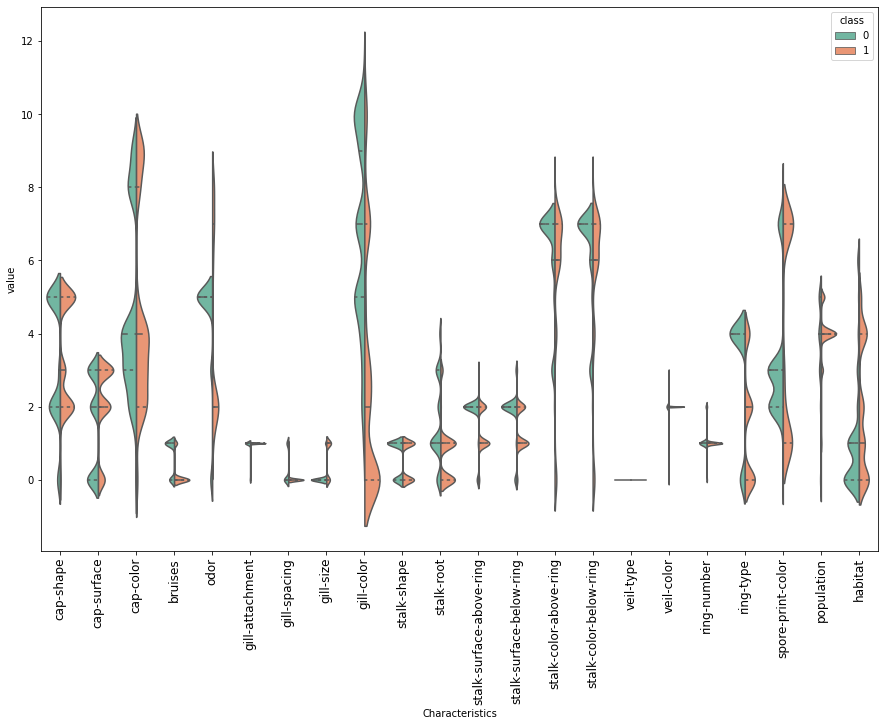

In [23]:
#violin plot represents the distribution of the feature characteristics

df_violin = pd.melt(df, 'class', var_name='Characteristics')

fig, ax = plt.subplots(figsize=(15,10))

vioplt = sns.violinplot(ax=ax, x='Characteristics', y='value', hue='class', data=df_violin, split=True, inner='quartile', palette='Set2')

vioplt.set_xticklabels(rotation=90, labels=list(df_dropclass.columns), fontsize=12);

### Observations: 
    It is possible to see that the features like gill-color, odor, stalk color,
    stalk root etc clearly divides into two parts which indicates that they may
    contribute to the classification. 
     
    Note:
    Green-edible-class 0   
    Orange-poisonous-class 1
    
    From violin plot we get a clear inference about the density distribution of features.

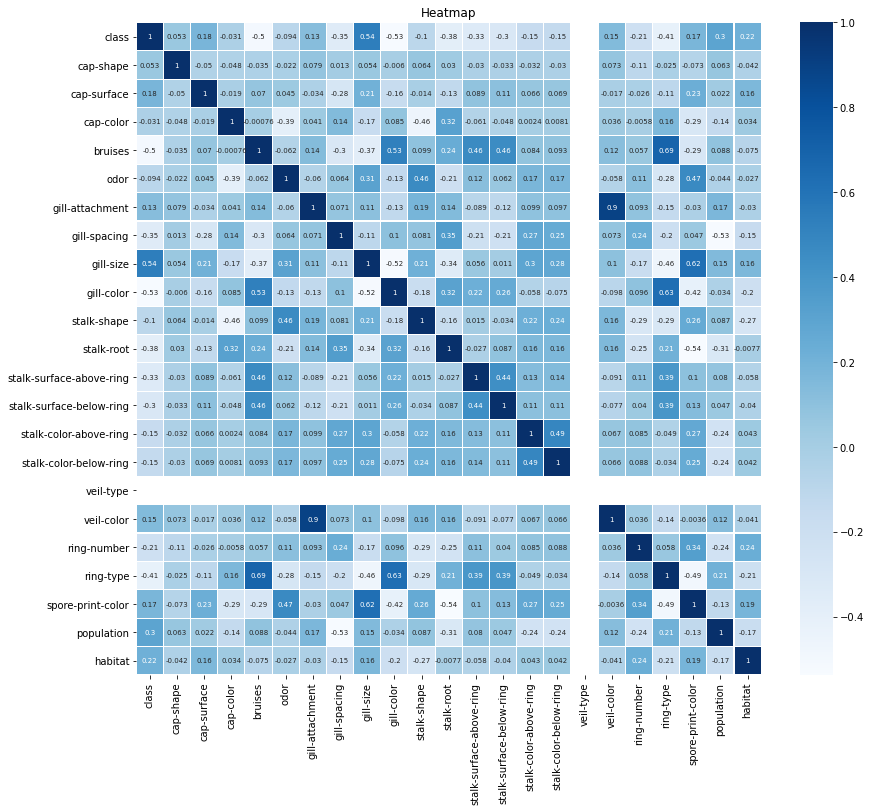

In [24]:
#Heatmap representing the correlation between the variables

corr = df.corr()

plt.figure(figsize=(14,12))

sns.heatmap(corr, linewidths=.1, cmap='Blues', annot=True, annot_kws={'size': 7})

plt.title('Heatmap')

plt.yticks(rotation=0);

### Observations:
    The column veil-type is of corr:0 and not contributing to the data so we’ll remove it.
    Gill color, gill size, ring type, stalk root and gill spacing are more correlated to class.
    Of which, gill colour shows max negative correlation(-0.53).
    Therefore, gill color is a prominent feature for classification.

In [25]:
#drop veil-type since it has only one category:0-partial
df = df.drop(['veil-type'], axis=1)

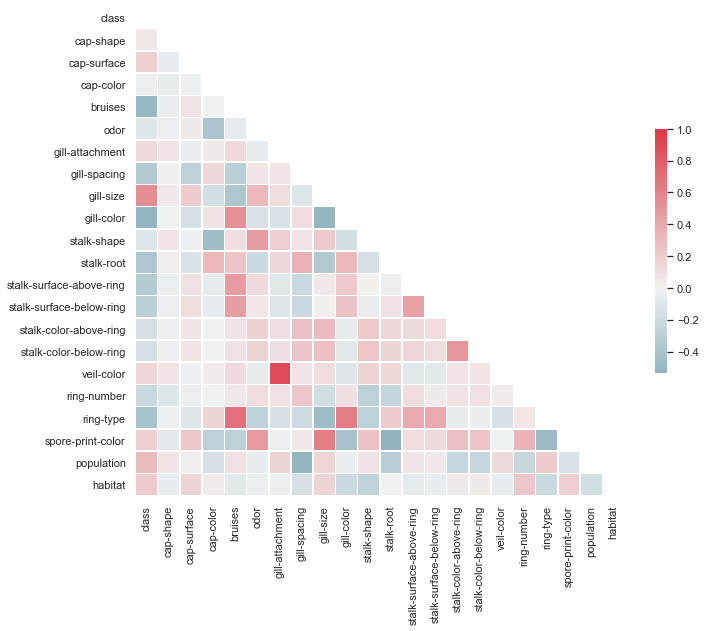

In [26]:
#plotting correlation matrix again after removing veil-type column

corr = df.corr()

sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)]=True

f,ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show();

### Observations: 
    From heatmap, it is seen that features gill-attachment and veil color are highly correlated.
    One of these features may also be dropped.

In [27]:
#correlation values: positive correlation with 'class'
corr['class'].sort_values(ascending=False).head(10)

class                1.000000
gill-size            0.540024
population           0.298686
habitat              0.217179
cap-surface          0.178446
spore-print-color    0.171961
veil-color           0.145142
gill-attachment      0.129200
cap-shape            0.052951
cap-color           -0.031384
Name: class, dtype: float64

In [28]:
#correlation values: negative correlation with 'class'
corr['class'].sort_values(ascending=True).head(10)

gill-color                 -0.530566
bruises                    -0.501530
ring-type                  -0.411771
stalk-root                 -0.379361
gill-spacing               -0.348387
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
ring-number                -0.214366
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
Name: class, dtype: float64

In [29]:
#sorting gill color by class - encoded
df_gillcolor = df[['class', 'gill-color']].groupby(['gill-color'], as_index=True).mean().sort_values(by='class', ascending=False)
df_gillcolor

,class
gill-color,
0,1.000000
8,1.000000
3,0.721311
2,0.670213
7,0.428954
11,0.255814
10,0.204659
4,0.156863
5,0.106870


    Gill-colour:
    black=k=4, brown=n=5, buff=b=0, chocolate=h=3, grey=g=2, green=r=8, orange=o=6,
    pink=p=7, purple=u=9, red=e=1, white=w=10, yellow=y=11.

    Observations:
    
    0 & 8 i.e buff & green colored mushrooms, mean value=1 are classified as 100% poisonous.
    
    1 & 6 i.e red and orange colored mushrooms, mean value=0 can be classified as edible.
    

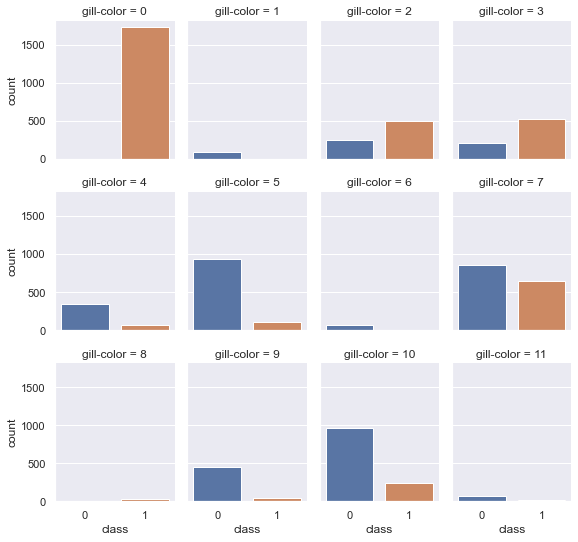

In [30]:
#classification labels of gill-colour types
sns.set_style('darkgrid')
sns.catplot('class', col='gill-color', data=df, kind='count', height=2.5, aspect=.8, col_wrap=4)
plt.show();

    Comments:
    
    Gill-colour:
    black=k=4, brown=n=5, buff=b=0, chocolate=h=3, grey=g=2, green=r=8, orange=o=6,
    pink=p=7, purple=u=9, red=e=1, white=w=10, yellow=y=11.
    
    Gill color is a prominent feature for classification.

## Prediction Model:

### Preparing the Data:

    Setting X and y; splitting the data into train and test respectively.

    Since we want to predict the class of the mushroom, we will drop the ‘class’ column.

In [31]:
#defining target and features for models
X = df.drop(['class'], axis=1)

y = df['class']

In [32]:
#creating test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [33]:
#setting up results dictionary to save different model accuracy results
results_dict={}

In [34]:
#function to get best model stats after running gridsearch
def gridbestmodel(model_name):
    print(model_name.best_score_)
    print(model_name.best_params_)
    print(model_name.best_estimator_)

In [35]:
#function to print results with test set and prediction variable
def getresults(test, pred_variable):
    return "F1:", metrics.f1_score(test, pred_variable), "Accuracy:", metrics.accuracy_score(y_test, pred_variable)

## Classification Methods:

### 1. Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [37]:
#parameter tuning using GridSearchCV
param_grid = {'max_depth': [1,11,15],
            'min_samples_leaf': [2,10,30],
            'splitter': ['best','random'],
            'criterion':['gini','entropy']}

dtc_grid = GridSearchCV(dtc, param_grid, cv=3, verbose=1)

In [38]:
#fitting tuned parameters
dtc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 11, 15],
                         'min_samples_leaf': [2, 10, 30],
                         'splitter': ['best', 'random']},
             verbose=1)

In [39]:
#best parameters
gridbestmodel(dtc_grid)

1.0
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 2, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=11, min_samples_leaf=2)


In [40]:

y_pred_dtc_grid = dtc_grid.predict(X_test)

print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dtc_grid))

print("Test Accuracy: {}%".format(round(dtc_grid.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


In [41]:
#pass results to dictionary
results_dict['Decision Tree Classifier'] = getresults(y_test, y_pred_dtc_grid)

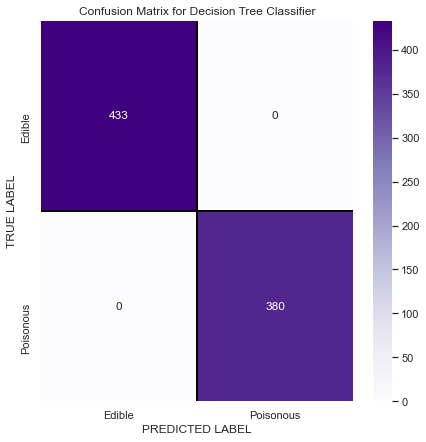

In [42]:
#Confusion Matrix for Decision Tree Classifier:

cm = confusion_matrix(y_test, y_pred_dtc_grid)

x_axis_labels = ["Edible", "Poisonous"]

y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

plt.show()

    Comments: 
    From confusion matrix it can be concluded that test & train set predictions are 100% accurate.

In [43]:
#feature importance scores
fea_imp = dtc_grid.best_estimator_.feature_importances_
feature_importance = pd.DataFrame(fea_imp, index=X.columns)
feature_importance.sort_values(by=0, ascending=False).head(10)

,0
gill-color,0.339818
spore-print-color,0.211110
population,0.179202
gill-size,0.116546
odor,0.036744
bruises,0.031426
stalk-shape,0.025505
habitat,0.024929
ring-number,0.019284
stalk-root,0.010232


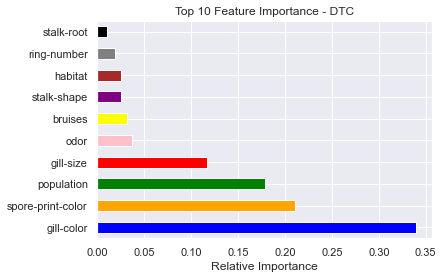

In [44]:
#plotting top 10 features
feature_importance = pd.Series(dtc_grid.best_estimator_.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh', color=['blue','orange','green','red','pink','yellow','purple','brown','gray','black'])
plt.title("Top 10 Feature Importance - DTC")
plt.xlabel('Relative Importance')
plt.show()

    From feature importance and EDA, the most important feature is gill-color.

### 2. Logistic Regression Classifer

In [45]:
#Logistic Regression Classification:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="lbfgs", max_iter=500)

lr.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Test Accuracy: 94.96%
Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.94      0.96      0.95       380

    accuracy                           0.95       813
   macro avg       0.95      0.95      0.95       813
weighted avg       0.95      0.95      0.95       813



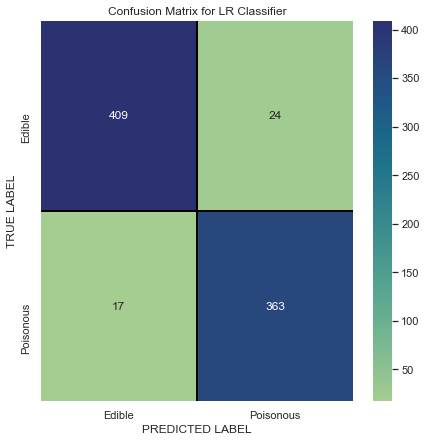

In [46]:
#Confusion Matrix for LR Classifier:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="crest", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LR Classifier')

plt.show()

    Comments:
    41 instances of error in predictions. Accuracy and f1 score is less.

In [47]:
#pass results to dictionary
results_dict['LR Classifier'] = getresults(y_test, y_pred_lr)

### 3. KNN Classifier:

In [48]:
#KNN Classification:

from sklearn.neighbors import KNeighborsClassifier

best_Kvalue = 0
best_score = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))

print("Test Accuracy: {}%".format(round(best_score*100,2)))

y_pred_knn = knn.predict(X_test)

print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

Best KNN Value: 1
Test Accuracy: 100.0%
KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       433
           1       0.99      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



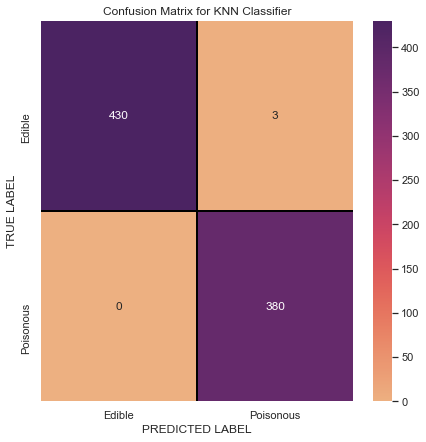

In [49]:
#Confusion Matrix for KNN Classifier:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="flare", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')

plt.show()

    Comments:
    Classified 3 instances that are actually edible as poisonous but didnot classify 
    any poisonous ones as edible. So, this classifier can also be considered
    for efficient modeling.

In [50]:
#pass results to dictionary
results_dict['KNN Classifier'] = getresults(y_test, y_pred_knn)

### 4. Support Vector Machines Classifier:

In [51]:
#SVM Classification:

from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto")

svm.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

y_pred_svm = svm.predict(X_test)

print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

Test Accuracy: 100.0%
SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



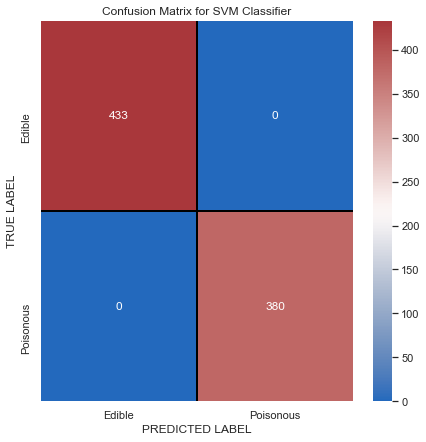

In [52]:
#Confusion Matrix for SVM Classifier:
cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="vlag", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')

plt.show()

In [53]:
#pass results to dictionary
results_dict['SVM Classifier'] = getresults(y_test, y_pred_svm)

### 5. Random Forest Classifier:

In [54]:
#Random Forest Classification:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [55]:
#parameter tuning using GridSearchCV
param_grid_rf={
    'max_depth': [5,11],
    'n_estimators': [200,500],
    'max_features': [5,10,20],
    'min_samples_leaf': [2,6],
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

In [56]:
#fitting tuned parameters
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 11], 'max_features': [5, 10, 20],
                         'min_samples_leaf': [2, 6],
                         'n_estimators': [200, 500]},
             scoring='accuracy', verbose=1)

In [57]:
#best parameters
gridbestmodel(grid_rf)

1.0
{'max_depth': 11, 'max_features': 5, 'min_samples_leaf': 2, 'n_estimators': 200}
RandomForestClassifier(max_depth=11, max_features=5, min_samples_leaf=2,
                       n_estimators=200)


In [58]:
#Predicting and estimating the result:

y_pred_rf = grid_rf.predict(X_test)

print("Test Accuracy: {}%".format(round(grid_rf.score(X_test, y_test)*100, 2)))

print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Test Accuracy: 100.0%
Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [59]:
#pass results to dictionary
results_dict['Random Forest Classifier'] = getresults(y_test, y_pred_rf)

In [60]:
#feature importance scores
fea_imp_rf = grid_rf.best_estimator_.feature_importances_
feature_importance_rf = pd.DataFrame(fea_imp_rf, index=X.columns)
feature_importance_rf.sort_values(by=0, ascending=False).head(10)

,0
odor,0.171974
gill-size,0.129879
gill-color,0.117039
spore-print-color,0.107125
ring-type,0.066654
population,0.061533
bruises,0.053998
stalk-root,0.053849
gill-spacing,0.043433
stalk-surface-below-ring,0.042061


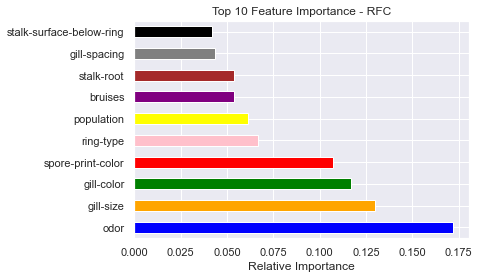

In [61]:
#plotting top 10 features
feature_importance_rf = pd.Series(grid_rf.best_estimator_.feature_importances_, index=X.columns)
feature_importance_rf.nlargest(10).plot(kind='barh', color=['blue','orange','green','red','pink','yellow','purple','brown','gray','black'])
plt.title("Top 10 Feature Importance - RFC")
plt.xlabel('Relative Importance')
plt.show()

    Comments:
    RFC model's feature importances indicates that odour, gill size, gill color,
    spore print color and stalk root type are features that contribute most to classification.

In [62]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(grid_rf, X_test, y_pred_rf);

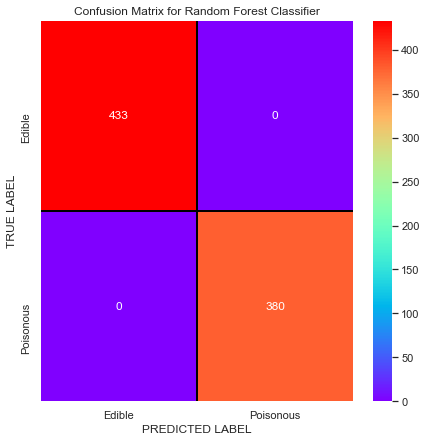

In [63]:
#Confusion Matrix for Random Forest Classifier:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="rainbow", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')

plt.show()

### 6. Naive Bayes Classifier

In [64]:
#Naive Bayes Classification: Gaussian
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 92.62%


In [65]:
#Classification report of Naive Bayes Classifier:

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

#Here is the output of the Naive Bayes Classifier report:

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.92      0.93       433
           1       0.91      0.94      0.92       380

    accuracy                           0.93       813
   macro avg       0.93      0.93      0.93       813
weighted avg       0.93      0.93      0.93       813



In [66]:
#pass results to dictionary
results_dict['Naive Bayes'] = getresults(y_test, y_pred_nb)

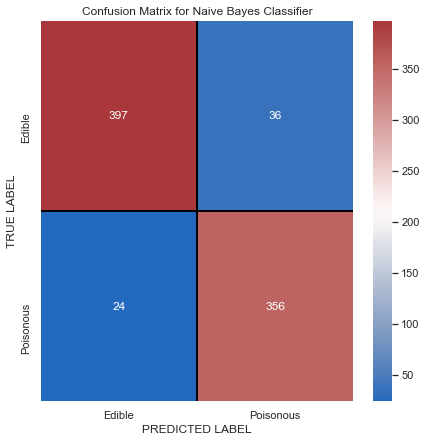

In [67]:
#Confusion Matrix for Naive Bayes Classifier:
cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="vlag", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')

plt.show()

### Conclusion:

    From the confusion matrix, we saw that Naive Bayes classifier has wrongly predicted
    60 instances and the accuracy of classifier is just around 90%.
    
    Most of other the classification methods like DT, SVM, RFC hit 100% accuracy with
    this dataset.

In [68]:
#print dictionary of result scores
results_dict

{'Decision Tree Classifier': ('F1:', 1.0, 'Accuracy:', 1.0),
 'LR Classifier': ('F1:', 0.9465449804432856, 'Accuracy:', 0.949569495694957),
 'KNN Classifier': ('F1:', 0.9960681520314547, 'Accuracy:', 0.996309963099631),
 'SVM Classifier': ('F1:', 1.0, 'Accuracy:', 1.0),
 'Random Forest Classifier': ('F1:', 1.0, 'Accuracy:', 1.0),
 'Naive Bayes': ('F1:', 0.922279792746114, 'Accuracy:', 0.9261992619926199)}

### Predictions:

    Predicting some of the X_test results and matching it with true i.e y_test values using
    1. LR Classifier
    2. Naive Bayes Classifier
    3. Random Forest Classifier.

[0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1]


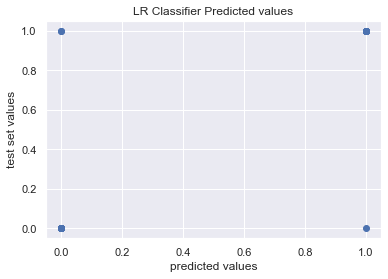

In [69]:
#take the first 25 datapoints of feature testset, then predicting these 25 instances

#Here, LR model is chosen for classification prediction
predslr = lr.predict(X_test)
print(predslr[:25])

#take the first 25 datapoints of labels testset and comparing with featureset predictions
#print values
print(y_test[:25].values)

#visualize the results
plt.scatter(predslr[:25], y_test[:25]);
plt.xlabel('predicted values')
plt.ylabel('test set values')
plt.title('LR Classifier Predicted values')
plt.show();

# 0 - Edible
# 1 - Poisonous

    Observations:
    As we can see, for LR Classifier, the predicted and true values
    doesnot match with some instances.

[0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1]


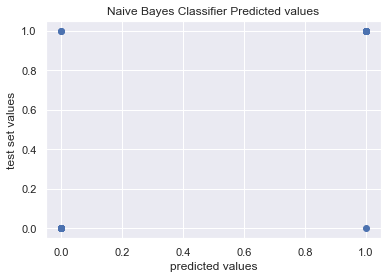

In [70]:
#Here, Naive Bayes model is chosen for prediction
predsnb = nb.predict(X_test)
print(predsnb[:25])

#take the first 25 datapoints of labels testset and comparing with featureset predictions
print(y_test[:25].values)

#visualize the results
plt.scatter(predsnb[:25], y_test[:25]);
plt.xlabel('predicted values')
plt.ylabel('test set values')
plt.title('Naive Bayes Classifier Predicted values')
plt.show();

    Observations:
    As we can see, for Naive Bayes Classifier, the predicted and true values
    doesnot match with some instances.

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1]


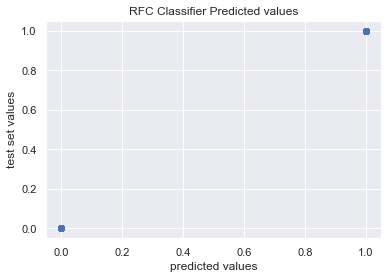

In [71]:
#Here, RFC model is chosen for prediction
predsrf = grid_rf.predict(X_test)
print(predsrf[:25])

#take the first 25 datapoints of labels testset and comparing with featureset predictions
#print values
print(y_test[:25].values)

#visualize the results
plt.scatter(predsrf[:25], y_test[:25]);
plt.xlabel('predicted values')
plt.ylabel('test set values')
plt.title('RFC Classifier Predicted values')
plt.show();

    Observations:
    As we can see, for RF Classifier, the predicted and true values exactly match.
    RFC is very accurate in classification and can be deployed for prediction.

### Exploratory Analysis of Important Features:-

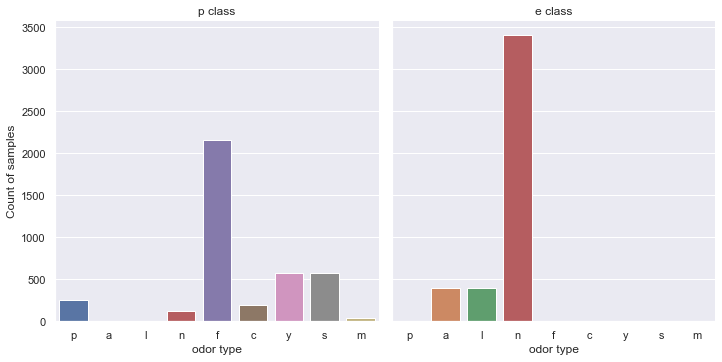

In [72]:
#category plots
#side by side comparison of odor and class
catplt = sns.catplot('odor', col='class', data=data, kind='count')
catplt.set_axis_labels('odor type', 'Count of samples')
catplt.set_titles('{col_name} {col_var}')
plt.show();

    Comments:
    If the mushroom has an unpleasant odor, it is likely to be poisonous.

In [73]:
#Defining a function for countplots alongwith classification labels

def classcount(col):
    plt.subplots()
    sns.set_style('darkgrid')
    sns.countplot(col, hue=data['class'], palette=['red','green'], data=data)
    plt.ylabel('Count of Samples')
    plt.title(col.title())
    plt.xlabel('Type of' + ' ' + col.title())
    plt.legend(labels=['Poisonous','Edible'])
    plt.show()

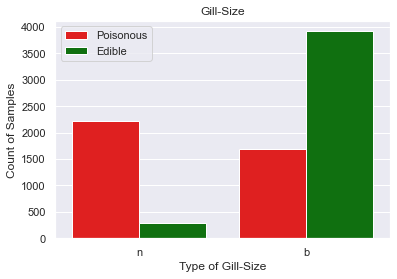

In [74]:
#feature - gill size
classcount('gill-size')

    Comments:
    If the gill size is narrow, then it is not-edible.

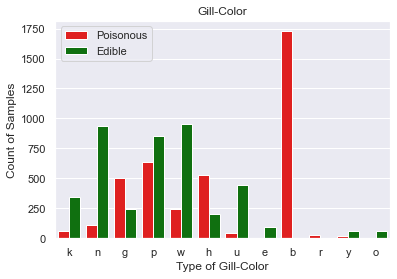

In [75]:
#feature - gill color
classcount('gill-color')

    Comments:
    Mushrooms with buff colored gills are poisonous.

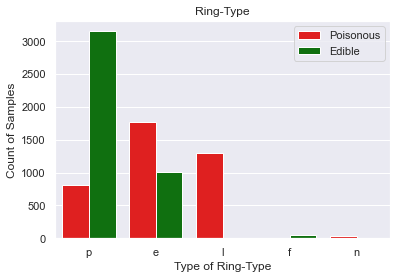

In [76]:
#feature - ring type
classcount('ring-type')

    Comments:
    Mushrooms with nil, large and evanescent rings are not-edible.
    Pendant and flaring ring type mushrooms are edible.

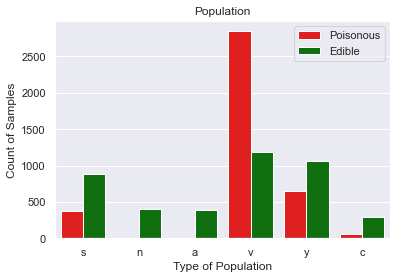

In [77]:
#feature - population
classcount('population')

    Comments:
    Most mushrooms grown in several distributed patches are not-edible.

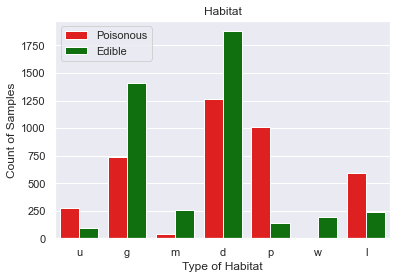

In [78]:
#feature - habitat
classcount('habitat')

    Comments:
    Mushrooms grown in leaves, urban areas, pathways are more likely to be poisonous.

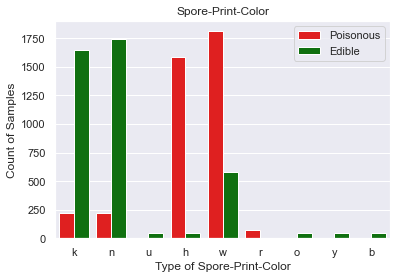

In [79]:
#feature - spore print color
classcount('spore-print-color')

    Comments: 
    Mushrooms with white and chocolate colored spores are not-edible.

## Conclusion:

    From feature importance analysis & EDA, mushrooms can be classified as edible
    or poisonous from the following set of descriptive characteristics;

    Odor: If the Mushroom has an odor, especially if the odor is not pleasant, it is likely to
    be poisonous.

    Gill Size: If the gills are narrow, it is likely to be poisonous.

    Spore Print Color: White, red, chocolate-colored are likely to be poisonous.
    
    Habitat: Mushrooms grown in leaves, urban paths are more likely to be poisonous.
    
    Bruises: If the mushroom does not have bruises, it is likely to be poisonous.

    Gill color: If the gills appear buff or green colored, it is likely to be poisonous.
    
    Ring type: Mushrooms with nil, large and evanescent rings are not-edible.
    
    From visual observations and statistical inferences mentioned above,
    we can assume the chances(probability) or arrive at the conclusion whether
    a mushroom is edible or not.
    
    Our classification models have performed really well with the dataset.
    Naive Bayes which has a score of 90% would not be a good choice given that the model
    predicted false negatives which could be dangerous, and that the other models performed 
    perfectly; the other models are much better suited to classify mushrooms.
    
    Obviously a better choice will be:
    Random Forest Classifier which is excellent in feature importance selection and accuracy.